<a name="0"></a>
# Introduction
### About Us
Welcome to [C241-PS174]'s notebook!

This notebook contains the model evaluation developed for our application, PawPal.
Our Machine Learning Team Members:

*   M281D4KX1467 - Alifya Meirza
*   M118D4KX2097 - Bintang Silalahi
*   M012D4KX2732 - Putri Nursyifa

Our Mobile Development Team Members:


*   A118D4KX4196 - Adinda Shafira Sholihin
*   A253D4KY4157 - Lalu Abdul Gofururrohiem


Our Cloud Computing Team Members:


*   C296D4KY0509 - Muhammad Abdul Hafizh Fathuddin
*   C296D4KY0027 - Muhammad Fawwas Shafiq Hudzaifa


### About PawPal
PawPal is an application developed by [C241-PS174] Capstone team as the Capstone Project for Bangkit 2024 Batch 2 Final Assignment.
<br>Find out more: https://github.com/lalugofur/Project-Capstone-Bangkit-Academy-2024
### Model Overview
We strive to achieve >70% accuracy in both training and validation
Our model consist of several transfer learning models, which we tune using flatten, dense, and dropout layers
<br>The model is trained in seperate ipynb. This is the for evaluation purposes only.

Other available models:
- Inception_ResNet_v2
- InceptionV3

# Import Library

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random
import io
import imageio
import glob
import scipy.misc
import zipfile
import shutil
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont, ImageFile
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
from keras.models import load_model

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, confusion_matrix

# from object_detection.utils import label_map_util
# from object_detection.utils import config_util
# from object_detection.utils import visualization_utils as viz_utils
# # from object_detection.utils import colab_utils
# from object_detection.builders import model_builder

%matplotlib inline

2024-06-17 23:43:09.809719: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 23:43:10.075365: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 23:43:11.758672: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-06-17 23:43:11.758747: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-06-17 23:43:11.763550: I tensorflow/c/logging.cc:34] Successfully open

# Import Model

In [2]:
model_inceptionV3 = load_model("model_72_2024_10_06.h5")

model_inception_resnet_v2 = load_model("model_74_inception_resnet_2024_10_06.h5")

2024-06-17 23:43:12.746184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 23:43:12.747262: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon RX 6800)
2024-06-17 23:43:12.799718: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 1 (AMD Radeon(TM) Graphics)
2024-06-17 23:43:12.853895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-17 23:43:12.853911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform

# Preprocessing the Data

### Load the dataset

This dataset used is a combination of several datasets
<br>List of dataset used:
- CatBreedsRefined-7k, available at: https://www.kaggle.com/datasets/doctrinek/catbreedsrefined-7k
- Animal Breed - Cats and Dogs, (dropped the dog images and class) available at: https://www.kaggle.com/datasets/imsparsh/animal-breed-cats-and-dogs
- Cat Breed, available at: https://www.kaggle.com/datasets/solothok/cat-breed

In [15]:
# Load the dataset
NEW_DATA_DIR = './corrected_dataset'
cats_7k_data_dir = './corrected_dataset'
breed_names = os.listdir(cats_7k_data_dir)
print(breed_names)

['birman', 'mainecoon', 'norwegianforest', 'americancurl', 'exoticshorthair', 'sphynx', 'americanbobtail', 'egyptianmau', 'manx', 'scottishfold', 'ragdoll', 'americanshorthair', 'turkishangora', 'bengal', 'britishshorthair', 'abyssinian', 'siamese', 'russianblue', 'persian', 'bombay']


In [16]:
# validation data
validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.2)

validation_generator = validation_datagen.flow_from_directory(
    cats_7k_data_dir,
    target_size=(224,224),
    batch_size=128,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 1799 images belonging to 20 classes.


In [17]:
true_labels = validation_generator.classes
label_names = validation_generator.class_indices.keys()

# Inception_V3 Model

Checking Accuracy and Loss

In [24]:
inception_result = model_inceptionV3.evaluate(validation_generator)

for metric, value in zip(model_inceptionV3.metrics_names, inception_result):
    print(metric + ': {:.3}'.format(value))

15/15 [==============================] - 3s 205ms/step - loss: 0.9849 - accuracy: 0.7276
loss: 0.985
accuracy: 0.728


Classification Result

In [25]:
predictions_inceptionV3 = model_inceptionV3.predict_generator(validation_generator)
predicted_labels_inceptionV3 = np.argmax(predictions_inceptionV3, axis=1)

print("Classification Result:")
print("\n\n", classification_report(true_labels, predicted_labels_inceptionV3, target_names=label_names))

/tmp/ipykernel_43899/1485340837.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_inceptionV3 = model_inceptionV3.predict_generator(validation_generator)


Classification Result:


                    precision    recall  f1-score   support

       abyssinian       0.77      0.84      0.80        82
  americanbobtail       0.39      0.40      0.40        70
     americancurl       0.59      0.49      0.53        68
americanshorthair       0.49      0.34      0.40       119
           bengal       0.78      0.84      0.81       129
           birman       0.74      0.91      0.82        70
           bombay       0.79      0.86      0.82        79
 britishshorthair       0.64      0.74      0.69        78
      egyptianmau       0.75      0.71      0.73        79
  exoticshorthair       0.75      0.71      0.73        69
        mainecoon       0.63      0.64      0.64       128
             manx       0.53      0.62      0.57        76
  norwegianforest       0.59      0.68      0.63        68
          persian       0.78      0.80      0.79        79
          ragdoll       0.79      0.78      0.79       129
      russianblue       0.82 

In [26]:
print('Test accuracy = ', round(accuracy_score(true_labels, predicted_labels_inceptionV3), 2))
score_macro = f1_score(true_labels, predicted_labels_inceptionV3, average="macro")
print("Macro F1-Score: ", score_macro)
score_micro = f1_score(true_labels, predicted_labels_inceptionV3, average="micro")
print("Micro F1-Score: ", score_micro)
score_weighted = f1_score(true_labels, predicted_labels_inceptionV3, average="weighted")
print("Weighted F1-Score: ", score_weighted)

Test accuracy =  0.73
Macro F1-Score:  0.7167782732505721
Micro F1-Score:  0.7276264591439688
Weighted F1-Score:  0.7243502883102206


Confusion Matrix

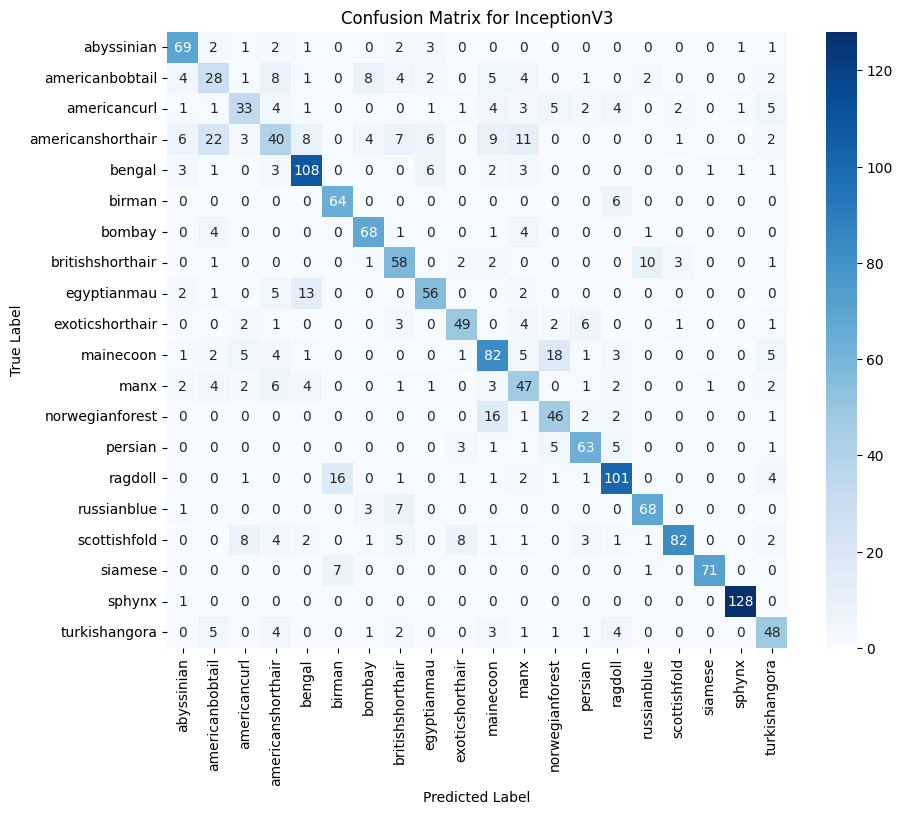

In [27]:
confusion_matrix_inceptionV3 = confusion_matrix(true_labels, predicted_labels_inceptionV3)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_inceptionV3, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for InceptionV3')
plt.show()

# Inception_ResNet_V2 Model

Checking Accuracy and Loss

In [29]:
inception_resnet_v2_result = model_inception_resnet_v2.evaluate(validation_generator)

for metric, value in zip(model_inception_resnet_v2.metrics_names, inception_resnet_v2_result):
    print(metric + ': {:.3}'.format(value))

15/15 [==============================] - 4s 254ms/step - loss: 0.9061 - accuracy: 0.7471
loss: 0.906
accuracy: 0.747


Classification Result

In [30]:
predictions_inception_resnet_v2 = model_inception_resnet_v2.predict_generator(validation_generator)
predicted_labels_inception_resnet_v2 = np.argmax(predictions_inception_resnet_v2, axis=1)

print("Classification Result:")
print("\n\n", classification_report(true_labels, predicted_labels_inception_resnet_v2, target_names=label_names))

/tmp/ipykernel_43899/3504948906.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_inception_resnet_v2 = model_inception_resnet_v2.predict_generator(validation_generator)
2024-06-17 23:57:55.940443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Classification Result:


                    precision    recall  f1-score   support

       abyssinian       0.75      0.87      0.80        82
  americanbobtail       0.53      0.11      0.19        70
     americancurl       0.76      0.66      0.71        68
americanshorthair       0.57      0.42      0.49       119
           bengal       0.78      0.84      0.81       129
           birman       0.71      0.80      0.75        70
           bombay       0.83      0.91      0.87        79
 britishshorthair       0.65      0.72      0.68        78
      egyptianmau       0.70      0.86      0.77        79
  exoticshorthair       0.65      0.80      0.72        69
        mainecoon       0.70      0.72      0.71       128
             manx       0.50      0.68      0.57        76
  norwegianforest       0.76      0.69      0.72        68
          persian       0.84      0.81      0.83        79
          ragdoll       0.77      0.75      0.76       129
      russianblue       0.88 

In [31]:
print('Test accuracy = ', round(accuracy_score(true_labels, predicted_labels_inception_resnet_v2), 2))
score_macro = f1_score(true_labels, predicted_labels_inception_resnet_v2, average="macro")
print("Macro F1-Score: ", score_macro)
score_micro = f1_score(true_labels, predicted_labels_inception_resnet_v2, average="micro")
print("Micro F1-Score: ", score_micro)
score_weighted = f1_score(true_labels, predicted_labels_inception_resnet_v2, average="weighted")
print("Weighted F1-Score: ", score_weighted)

Test accuracy =  0.75
Macro F1-Score:  0.7271195141635423
Micro F1-Score:  0.7470817120622569
Weighted F1-Score:  0.7361519200469364


Confusion Matrix

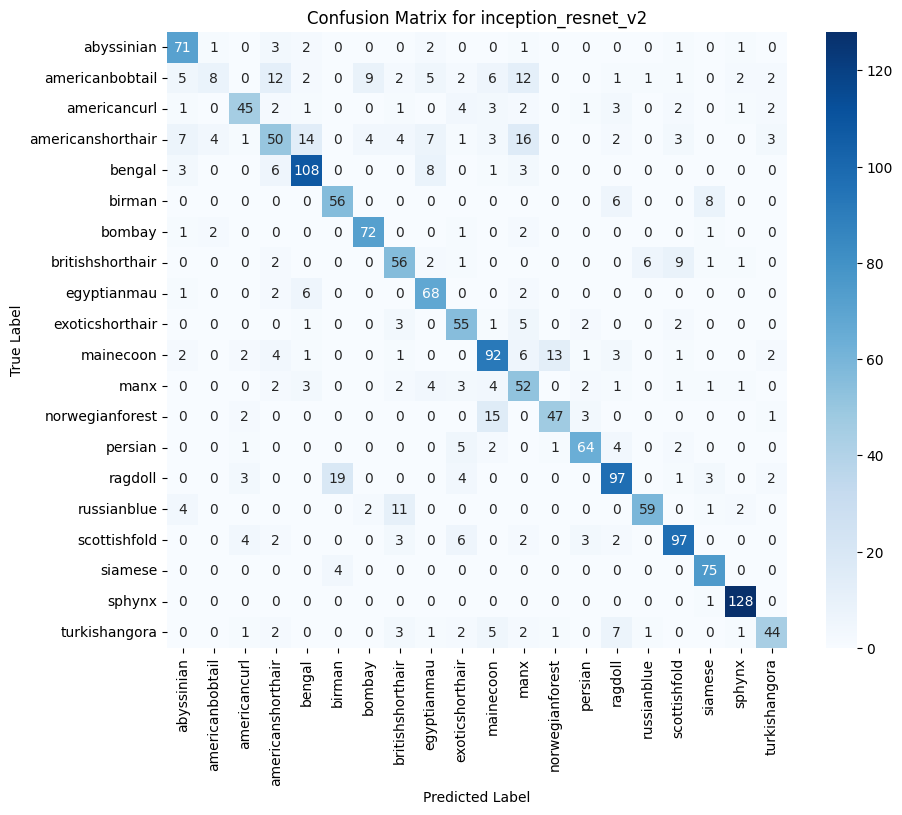

In [32]:
confusion_matrix_inception_resnet_v2 = confusion_matrix(true_labels, predicted_labels_inception_resnet_v2)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_inception_resnet_v2, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for inception_resnet_v2')
plt.show()